In [118]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Spotify Api Credentials 

In [121]:
# Declare the credentials
client_id = '2a7adde1b07a4bf9a5fd750d6ff6f28d'
client_secret = '74a5c5859a0548ccae791419cc29c8fa'
redirect_uri='http://localhost:7777/callback'
username = 'ethan.falcao'
#"383yg3vhnzhume0s2ug7p5y26' is Nur's account 


In [122]:
# Authorization flow
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

## Import data

In [123]:
#13k top spotify songs 
df=pd.read_csv('data/df.csv', sep=",")
#users favorite tracks based on time 
df_fav=pd.read_csv('data/df_fav.csv', sep=",")

## EDA

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12476 entries, 0 to 12475
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          12476 non-null  object 
 1   Song              12476 non-null  object 
 2   Artists           12476 non-null  object 
 3   Album             12476 non-null  object 
 4   length            12476 non-null  int64  
 5   time_signature    12476 non-null  int64  
 6   danceability      12476 non-null  float64
 7   acousticness      12476 non-null  float64
 8   energy            12476 non-null  float64
 9   tempo             12476 non-null  float64
 10  instrumentalness  12476 non-null  float64
 11  loudness          12476 non-null  float64
 12  liveness          12476 non-null  float64
 13  key               12476 non-null  float64
 14  valence           12476 non-null  float64
 15  speechiness       12476 non-null  float64
 16  mode              12476 non-null  int64 

In [125]:
df

,track_id,Song,Artists,Album,length,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,mode,Popularity,favorite
0,3rUGC1vUpkDG9CZFHMur1t,greedy,['Tate McRae'],greedy,131872,1,0.750,0.2560,0.7330,111.018,0.000000,-3.180,0.1140,6.0,0.844,0.0319,0,98.0,0
1,7aqfrAY2p9BUSiupwk3svU,First Person Shooter (feat. J. Cole),"['Drake', 'J. Cole']",For All The Dogs,247444,4,0.470,0.0277,0.6400,163.920,0.000000,-7.779,0.3820,2.0,0.248,0.3200,1,91.0,0
2,7dJYggqjKo71KI9sLzqCs8,Agora Hills,['Doja Cat'],Scarlet,265360,4,0.750,0.2280,0.6740,123.026,0.000089,-6.128,0.1220,8.0,0.392,0.0970,0,89.0,0
3,4MjDJD8cW7iVeWInc2Bdyj,MONACO,['Bad Bunny'],nadie sabe lo que va a pasar mañana,267194,4,0.787,0.1500,0.6210,139.056,0.000402,-5.009,0.5800,4.0,0.130,0.0680,0,94.0,0
4,5aIVCx5tnk0ntmdiinnYvw,Water,['Tyla'],Water,200256,4,0.673,0.0856,0.7220,117.187,0.000000,-3.495,0.1370,3.0,0.519,0.0755,0,92.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12471,5TUa3AsgSh3kJIuXn42wig,"Shout, Pts. 1 & 2",['The Isley Brothers'],It's Your Thing: The Story Of The Isley Brothers,267333,4,0.467,0.5490,0.8310,137.355,0.000000,-7.661,0.9500,10.0,0.547,0.0683,1,48.0,0
12472,6ZSTinOwx5dKFYc6iYyGDn,Leaving on a Jet Plane,"['Peter, Paul and Mary']",Album 1700,207240,4,0.414,0.8040,0.1670,133.450,0.000000,-16.519,0.1170,9.0,0.384,0.0484,1,62.0,0
12473,4DKRLDVRIGojztAOEdvmXK,I Put A Spell On You,['Nina Simone'],The Best Of Nina Simone,158200,3,0.340,0.9040,0.2970,90.539,0.001400,-12.990,0.0902,6.0,0.291,0.0345,0,0.0,0
12474,3IKyTBHZSgCx2v1ZX8v0TZ,Albatross - 2018 Remaster,['Fleetwood Mac'],The Pious Bird of Good Omen,191107,4,0.321,0.8330,0.0631,135.605,0.830000,-21.616,0.1410,6.0,0.264,0.0351,0,0.0,0


In [126]:
df.isnull().sum()

track_id            0
Song                0
Artists             0
Album               0
length              0
time_signature      0
danceability        0
acousticness        0
energy              0
tempo               0
instrumentalness    0
loudness            0
liveness            0
key                 0
valence             0
speechiness         0
mode                0
Popularity          0
favorite            0
dtype: int64

In [127]:
top_albums = df['Album'].value_counts().head(10)
top_albums

Album
Greatest Hits          30
Certified Lover Boy    19
- (Deluxe)             18
Spotify Singles        17
More Than You Know     15
÷ (Deluxe)             14
Justice                12
#PressPlayForPride     12
=                      12
1989                   11
Name: count, dtype: int64

In [128]:
top_artists = df['Artists'].value_counts().head()
top_artists

Artists
['The Beatles']      100
['Ed Sheeran']        70
['John Coltrane']     58
['Nina Simone']       52
['Ramones']           52
Name: count, dtype: int64

In [129]:
# Dropping columns that could lead to data leakage
df_num= df.drop(columns=['track_id','Song', 'Album', 'Artists' ])

In [130]:
df_cat = df[['track_id', 'Song', 'Album', 'Artists']]

In [131]:
df['Artists'].nunique()

8103

In [132]:
df_num.describe()

,length,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,mode,Popularity,favorite
count,1.247600e+04,12476.000000,12476.000000,12476.000000,12476.000000,12476.000000,12476.000000,12476.000000,12476.000000,12476.000000,12476.000000,12476.000000,12476.000000,12476.000000,12476.0
mean,2.389266e+05,3.899487,0.551771,0.317325,0.592457,120.136017,0.182072,-9.645638,0.183381,5.301379,0.436285,0.080486,0.637785,50.770199,0.0
std,1.267425e+05,0.440619,0.189021,0.362403,0.284793,29.070033,0.323811,6.968844,0.148875,3.551790,0.258946,0.088480,0.480660,19.415045,0.0
min,9.750000e+03,0.000000,0.000000,0.000001,0.000568,0.000000,0.000000,-44.150000,0.012000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.773818e+05,4.000000,0.427000,0.016075,0.412000,98.018750,0.000000,-10.998250,0.094200,2.000000,0.217000,0.036800,0.000000,39.000000,0.0
50%,2.120865e+05,4.000000,0.569000,0.128000,0.656000,122.002000,0.000300,-7.211500,0.122000,5.000000,0.419000,0.047300,1.000000,52.000000,0.0
75%,2.594198e+05,4.000000,0.691000,0.611000,0.829000,137.959000,0.177000,-5.191750,0.225000,8.000000,0.635000,0.078700,1.000000,65.000000,0.0
max,4.170227e+06,5.000000,0.978000,0.996000,0.999000,219.446000,0.986000,1.177000,0.985000,11.000000,0.994000,0.960000,1.000000,100.000000,0.0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12476 entries, 0 to 12475
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          12476 non-null  object 
 1   Song              12476 non-null  object 
 2   Artists           12476 non-null  object 
 3   Album             12476 non-null  object 
 4   length            12476 non-null  int64  
 5   time_signature    12476 non-null  int64  
 6   danceability      12476 non-null  float64
 7   acousticness      12476 non-null  float64
 8   energy            12476 non-null  float64
 9   tempo             12476 non-null  float64
 10  instrumentalness  12476 non-null  float64
 11  loudness          12476 non-null  float64
 12  liveness          12476 non-null  float64
 13  key               12476 non-null  float64
 14  valence           12476 non-null  float64
 15  speechiness       12476 non-null  float64
 16  mode              12476 non-null  int64 

Categorical Values

In [136]:
# Count unique values 
print("Unique Track IDs:", df['track_id'].nunique())
print("Unique Songs:",  df['Song'].nunique())
print("Unique Artists:", df['Artists'].nunique())
print("Unique Albums:", df['Album'].nunique())

Unique Track IDs: 12476
Unique Songs: 11743
Unique Artists: 8103
Unique Albums: 9726


In [137]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Artists'], df['Album'])
chi2, p, _, _ = chi2_contingency(contingency_table)
p

0.0

In [138]:
alpha = 0.05  # Set your significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Artists and Album.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Category1 and Category2.")


Reject the null hypothesis: There is a significant association between Artists and Album.


In [139]:
category_proportions = df_cat['Song'].value_counts(normalize=True)
category_proportions

Song
Forever                                  0.000641
Boyfriend                                0.000481
Hello                                    0.000401
Save Me                                  0.000401
On & On                                  0.000401
                                           ...   
Heels Over Head                          0.000080
Hey Driver (feat. The War and Treaty)    0.000080
Rich Men North of Richmond               0.000080
Mean Old Sun                             0.000080
Albatross - 2018 Remaster                0.000080
Name: proportion, Length: 11743, dtype: float64

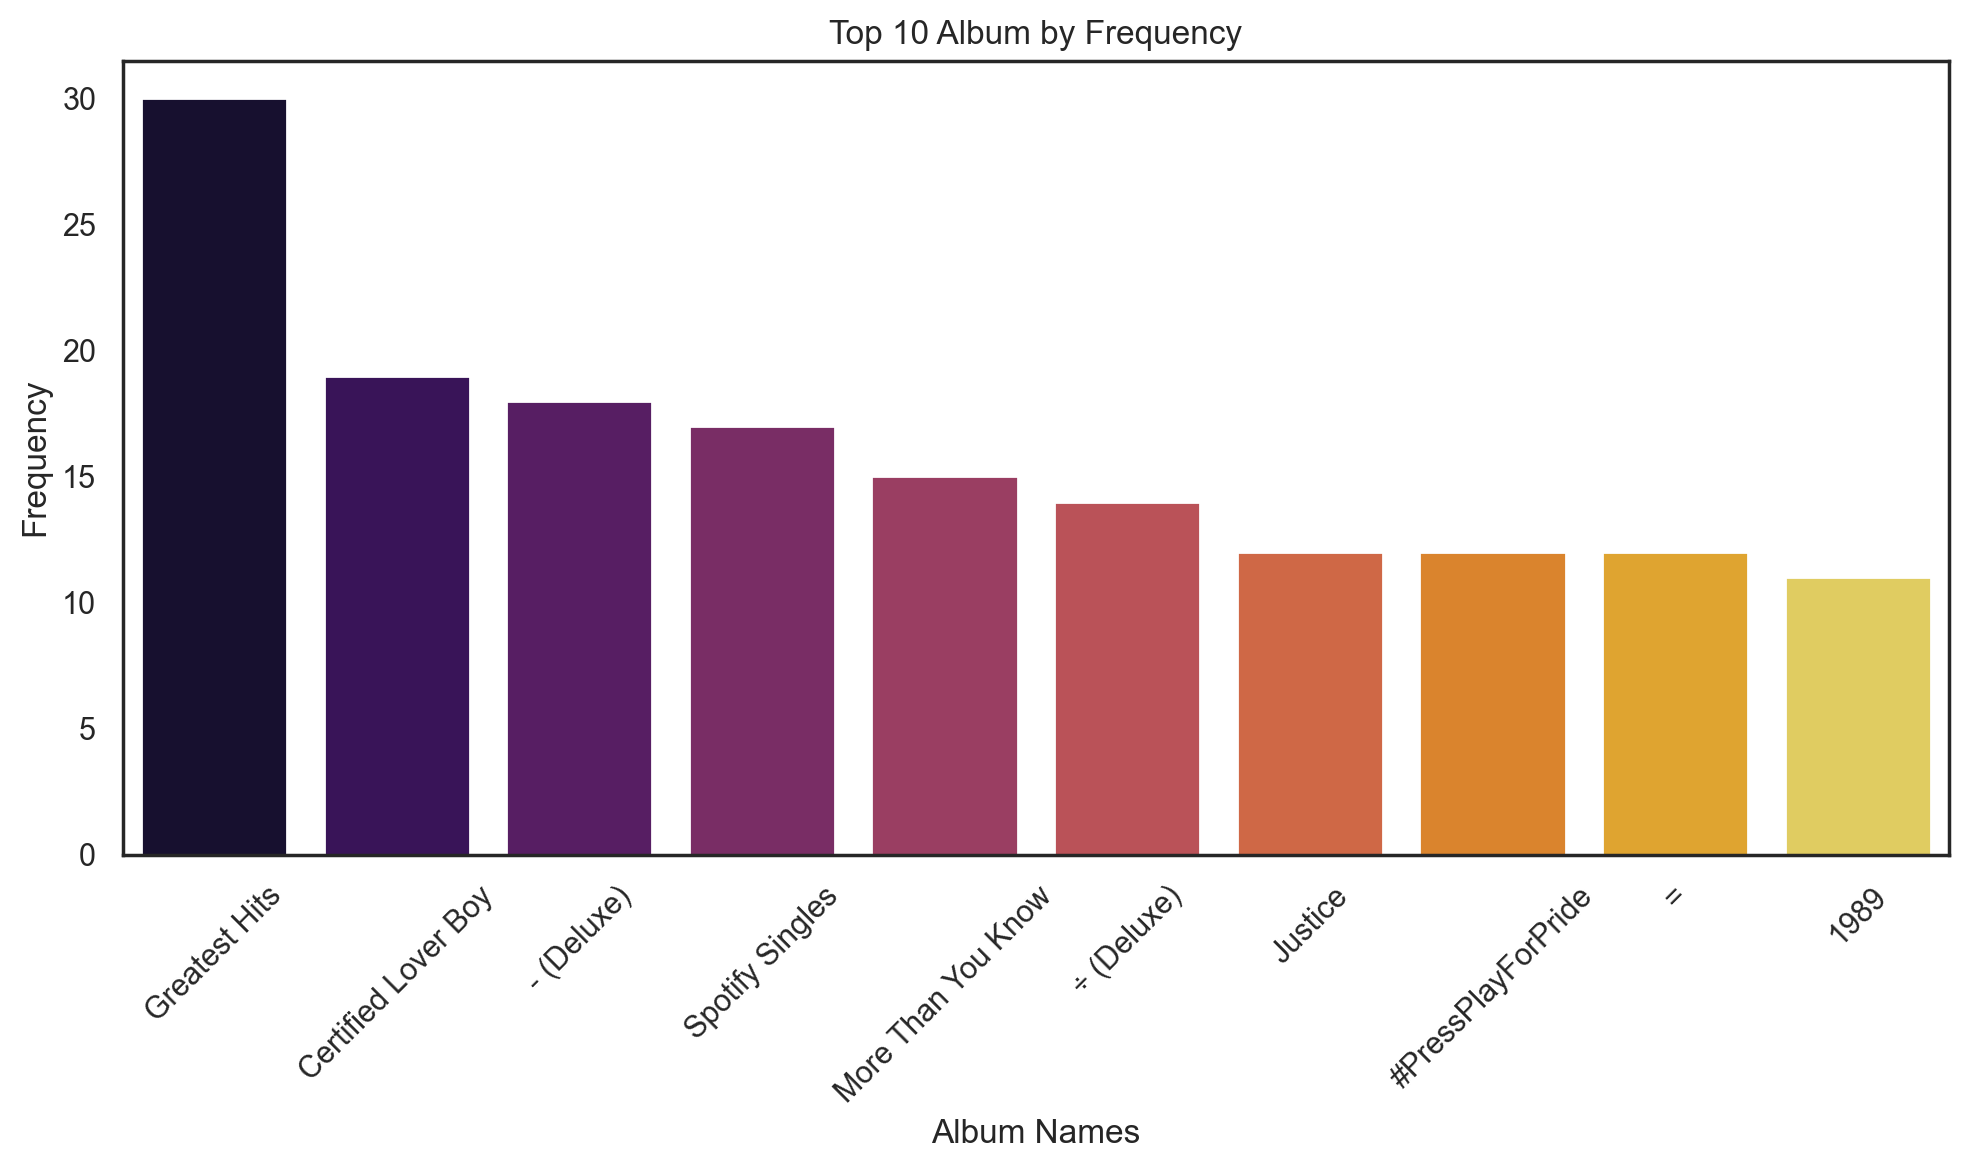

In [140]:
# Get the top 10 artists based on their frequency
top_10_artists = df['Album'].value_counts().head(10).reset_index()
top_10_artists.columns = ['Album Names', 'Frequency']


# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Album Names', y='Frequency', data=top_10_artists, palette="inferno")
plt.xticks(rotation=45)  
plt.xlabel('Album Names')
plt.ylabel('Frequency')
plt.title('Top 10 Album by Frequency')
plt.tight_layout()
plt.show()


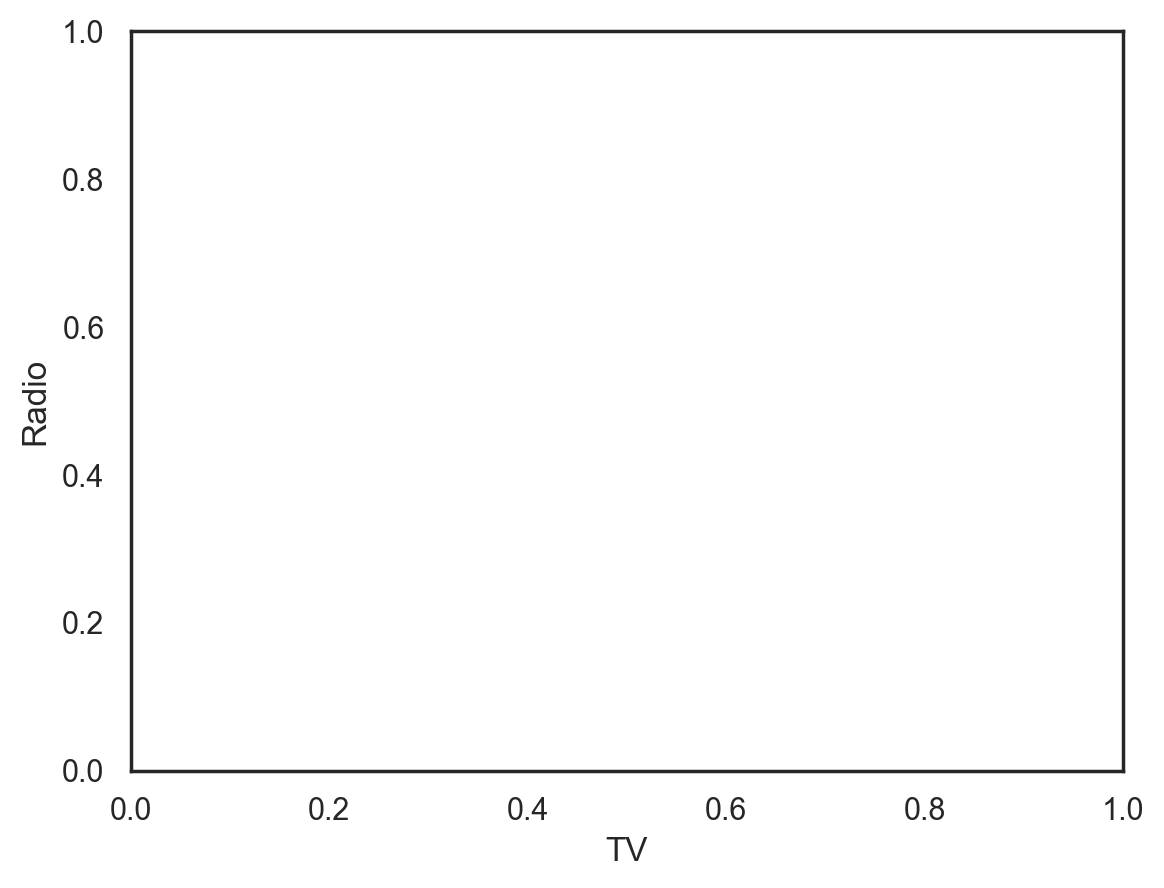

In [141]:
from mpl_toolkits.mplot3d import Axes3D

# Input vs Input
xs = df['energy'].values.reshape(-1,1)
ys = df['Popularity'].values.reshape(-1,1)
zs = df['tempo'].values.reshape(-1,1)


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs[0::10], ys[0::10], zs[0::10],s=100, edgecolor="r", facecolor="gold")
plt.xlabel('TV')  
plt.ylabel('Radio') 
plt.show()

<Axes: >

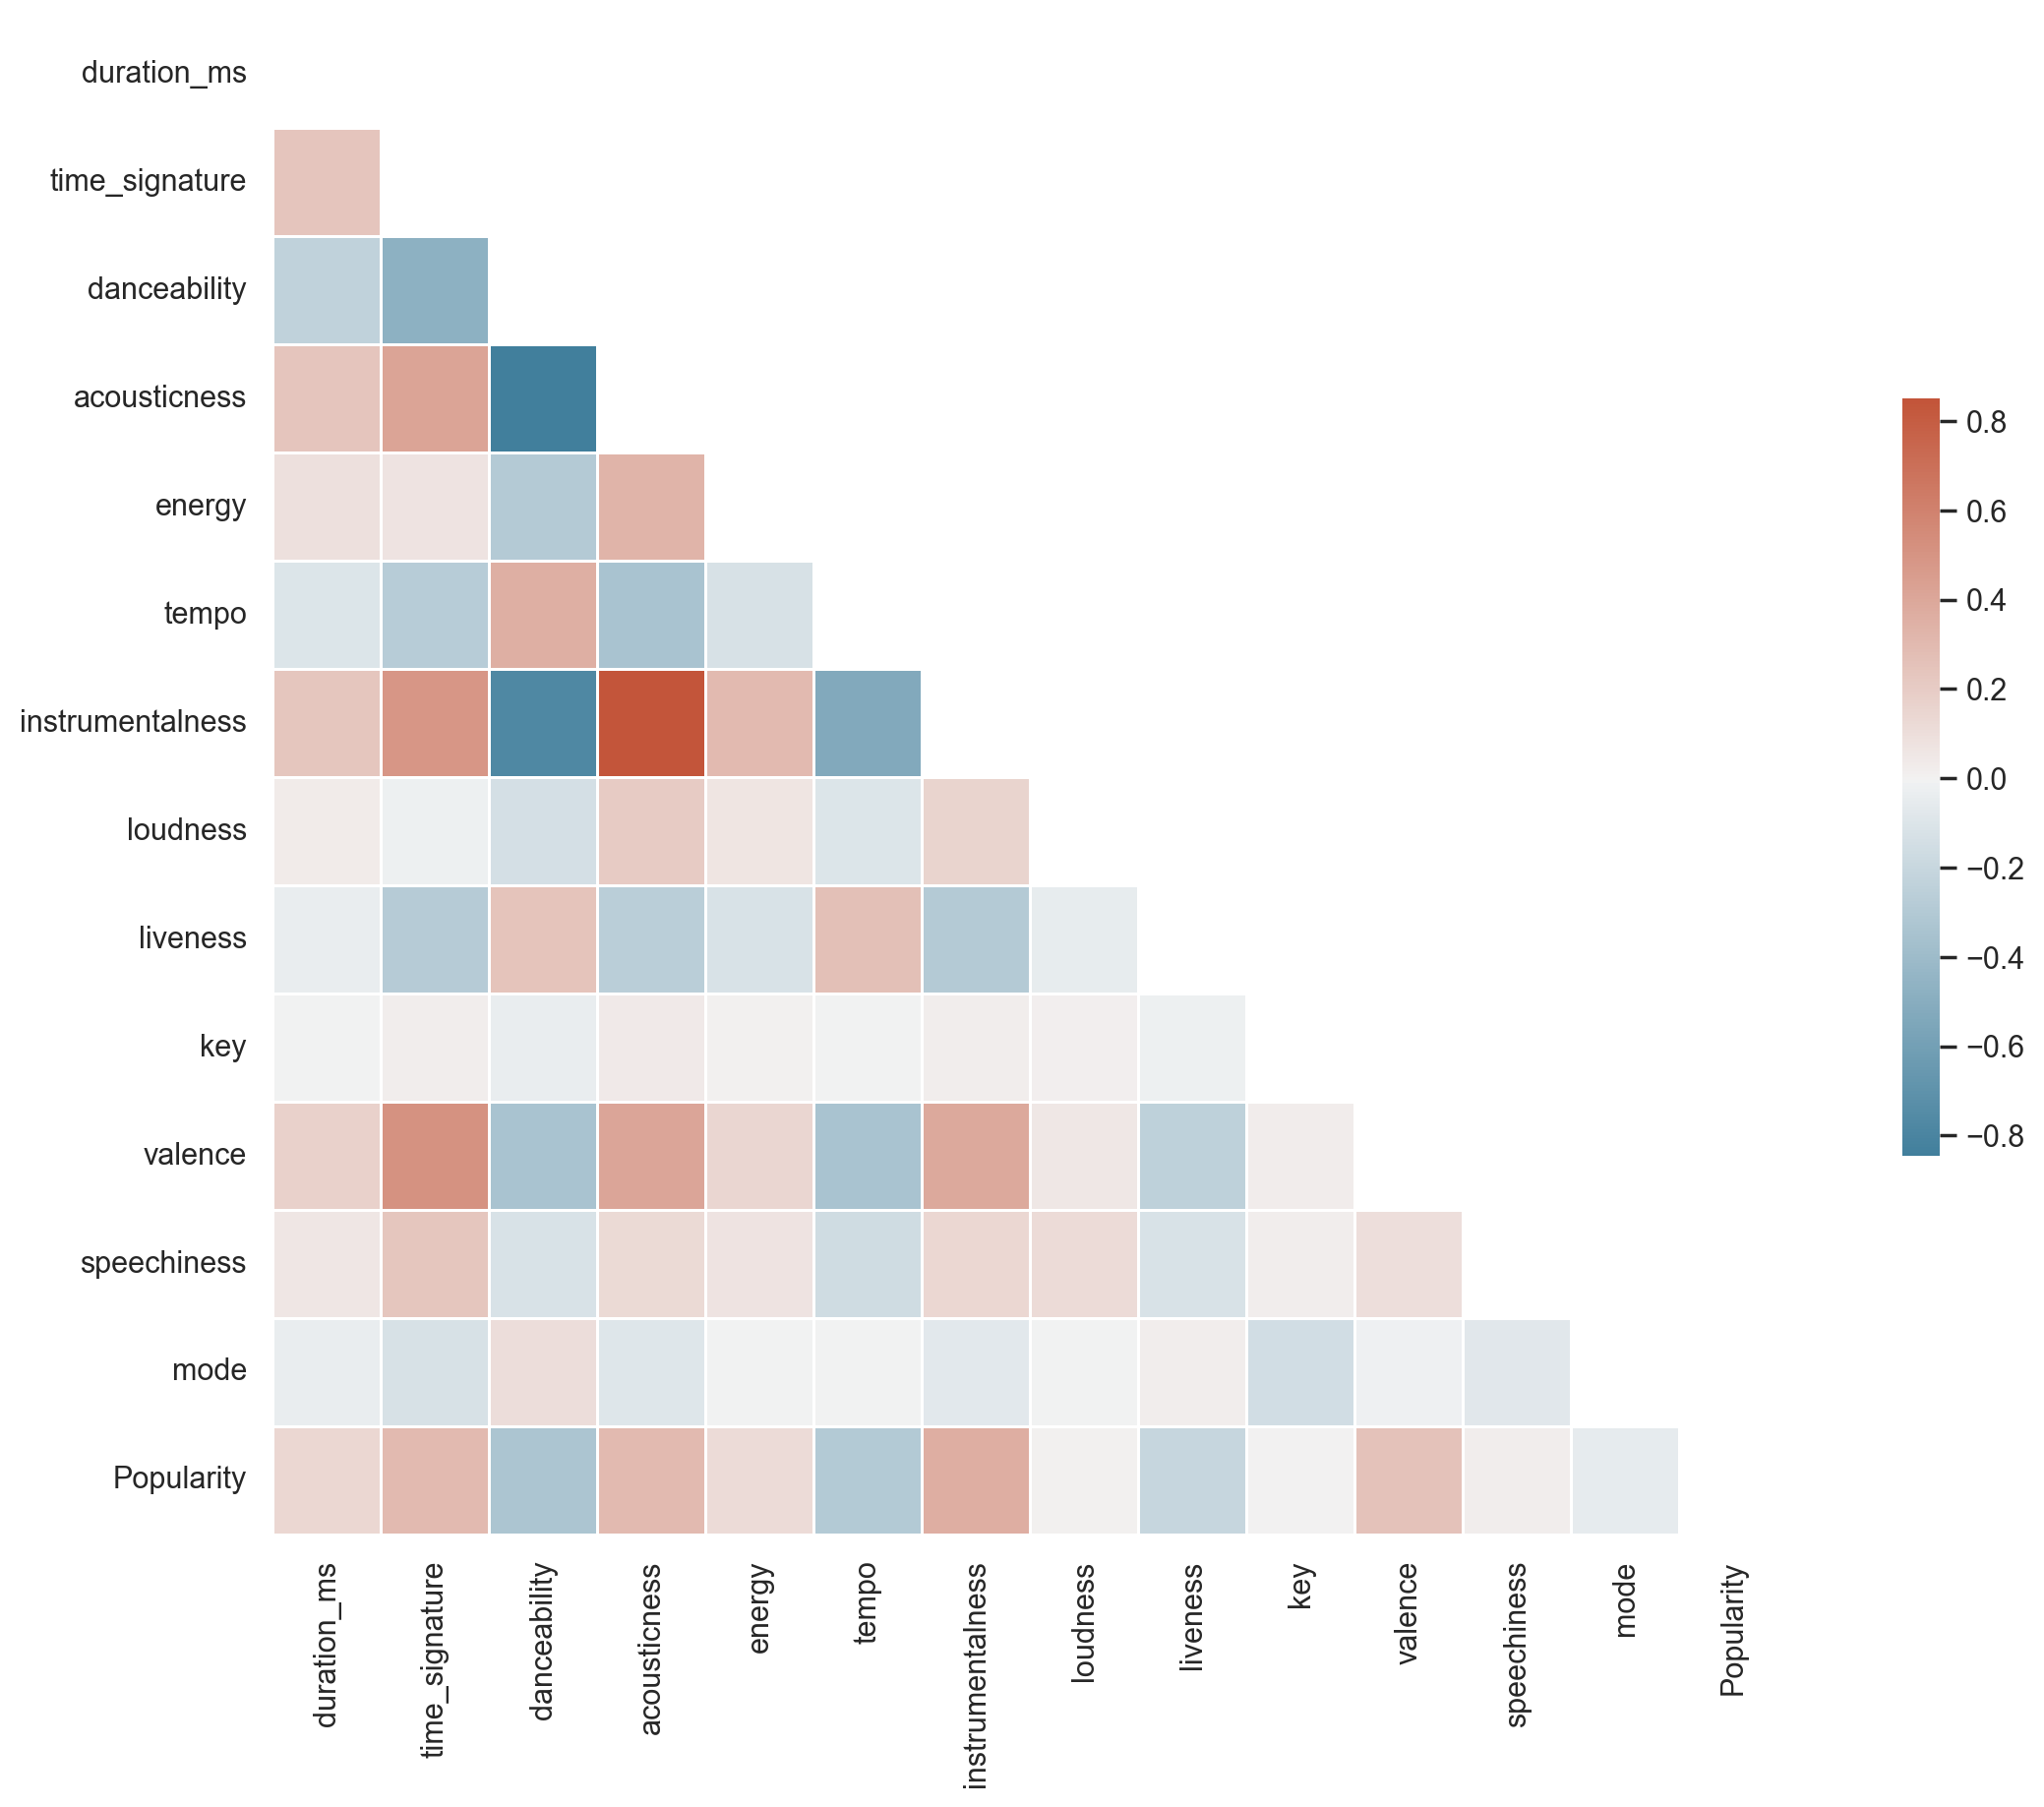

In [142]:
#A better example (formatting used in below chart) - https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})


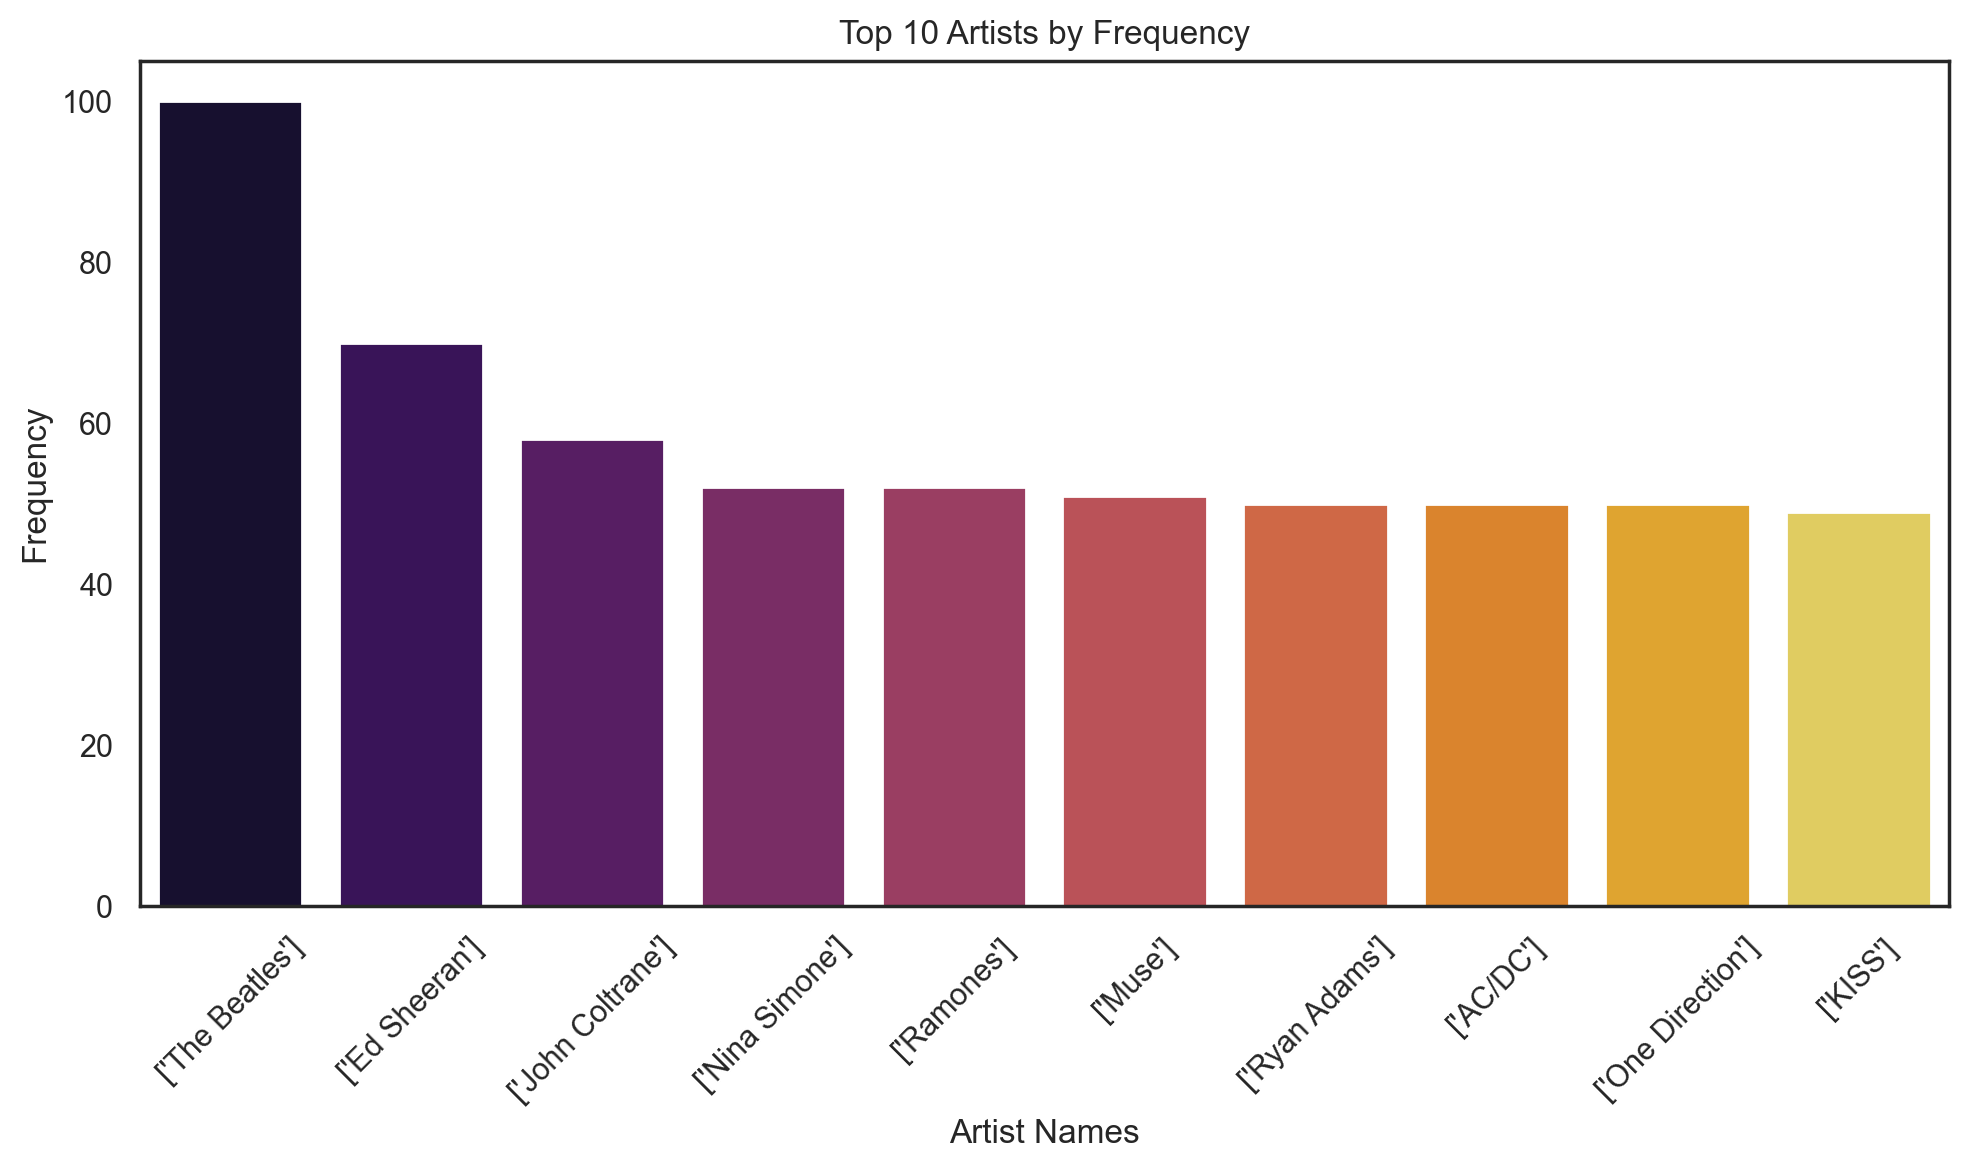

In [143]:
# Get the top 10 artists based on their frequency
top_10_artists = df['Artists'].value_counts().head(10).reset_index()
top_10_artists.columns = ['Artist Names', 'Frequency']


# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Artist Names', y='Frequency', data=top_10_artists, palette="inferno")
plt.xticks(rotation=45)  
plt.xlabel('Artist Names')
plt.ylabel('Frequency')
plt.title('Top 10 Artists by Frequency')
plt.tight_layout()
plt.show()


In [145]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)

corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,length,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,mode,Popularity,favorite
length,1.000000,-0.043056,-0.290358,0.245320,-0.268111,-0.120469,0.268081,-0.288439,-0.047070,-0.016142,-0.249922,-0.120768,0.022945,-0.208669,nan
time_signature,-0.043056,1.000000,0.239619,-0.240032,0.237640,0.093605,-0.102115,0.232678,0.032933,-0.006048,0.170144,0.058781,-0.035661,0.139983,nan
danceability,-0.290358,0.239619,1.000000,-0.479386,0.424765,0.075723,-0.290917,0.497998,-0.021101,0.022066,0.519245,0.240863,-0.126792,0.305531,nan
acousticness,0.245320,-0.240032,-0.479386,1.000000,-0.846895,-0.293490,0.368422,-0.778568,-0.138348,-0.041847,-0.353363,-0.117012,0.107035,-0.338536,nan
energy,-0.268111,0.237640,0.424765,-0.846895,1.000000,0.328537,-0.352238,0.852528,0.202981,0.040796,0.417077,0.126959,-0.093638,0.310342,nan
tempo,-0.120469,0.093605,0.075723,-0.293490,0.328537,1.000000,-0.128371,0.297509,0.066437,0.007531,0.148820,0.072632,-0.006323,0.125496,nan
instrumentalness,0.268081,-0.102115,-0.290917,0.368422,-0.352238,-0.128371,1.000000,-0.534524,-0.100175,-0.005510,-0.342311,-0.168031,-0.009515,-0.295529,nan
loudness,-0.288439,0.232678,0.497998,-0.778568,0.852528,0.297509,-0.534524,1.000000,0.156181,0.022805,0.397133,0.136697,-0.076152,0.374882,nan
liveness,-0.047070,0.032933,-0.021101,-0.138348,0.202981,0.066437,-0.100175,0.156181,1.000000,0.014969,0.055310,0.113477,-0.011234,0.005383,nan
key,-0.016142,-0.006048,0.022066,-0.041847,0.040796,0.007531,-0.005510,0.022805,0.014969,1.000000,0.030243,0.021105,-0.150257,0.003203,nan


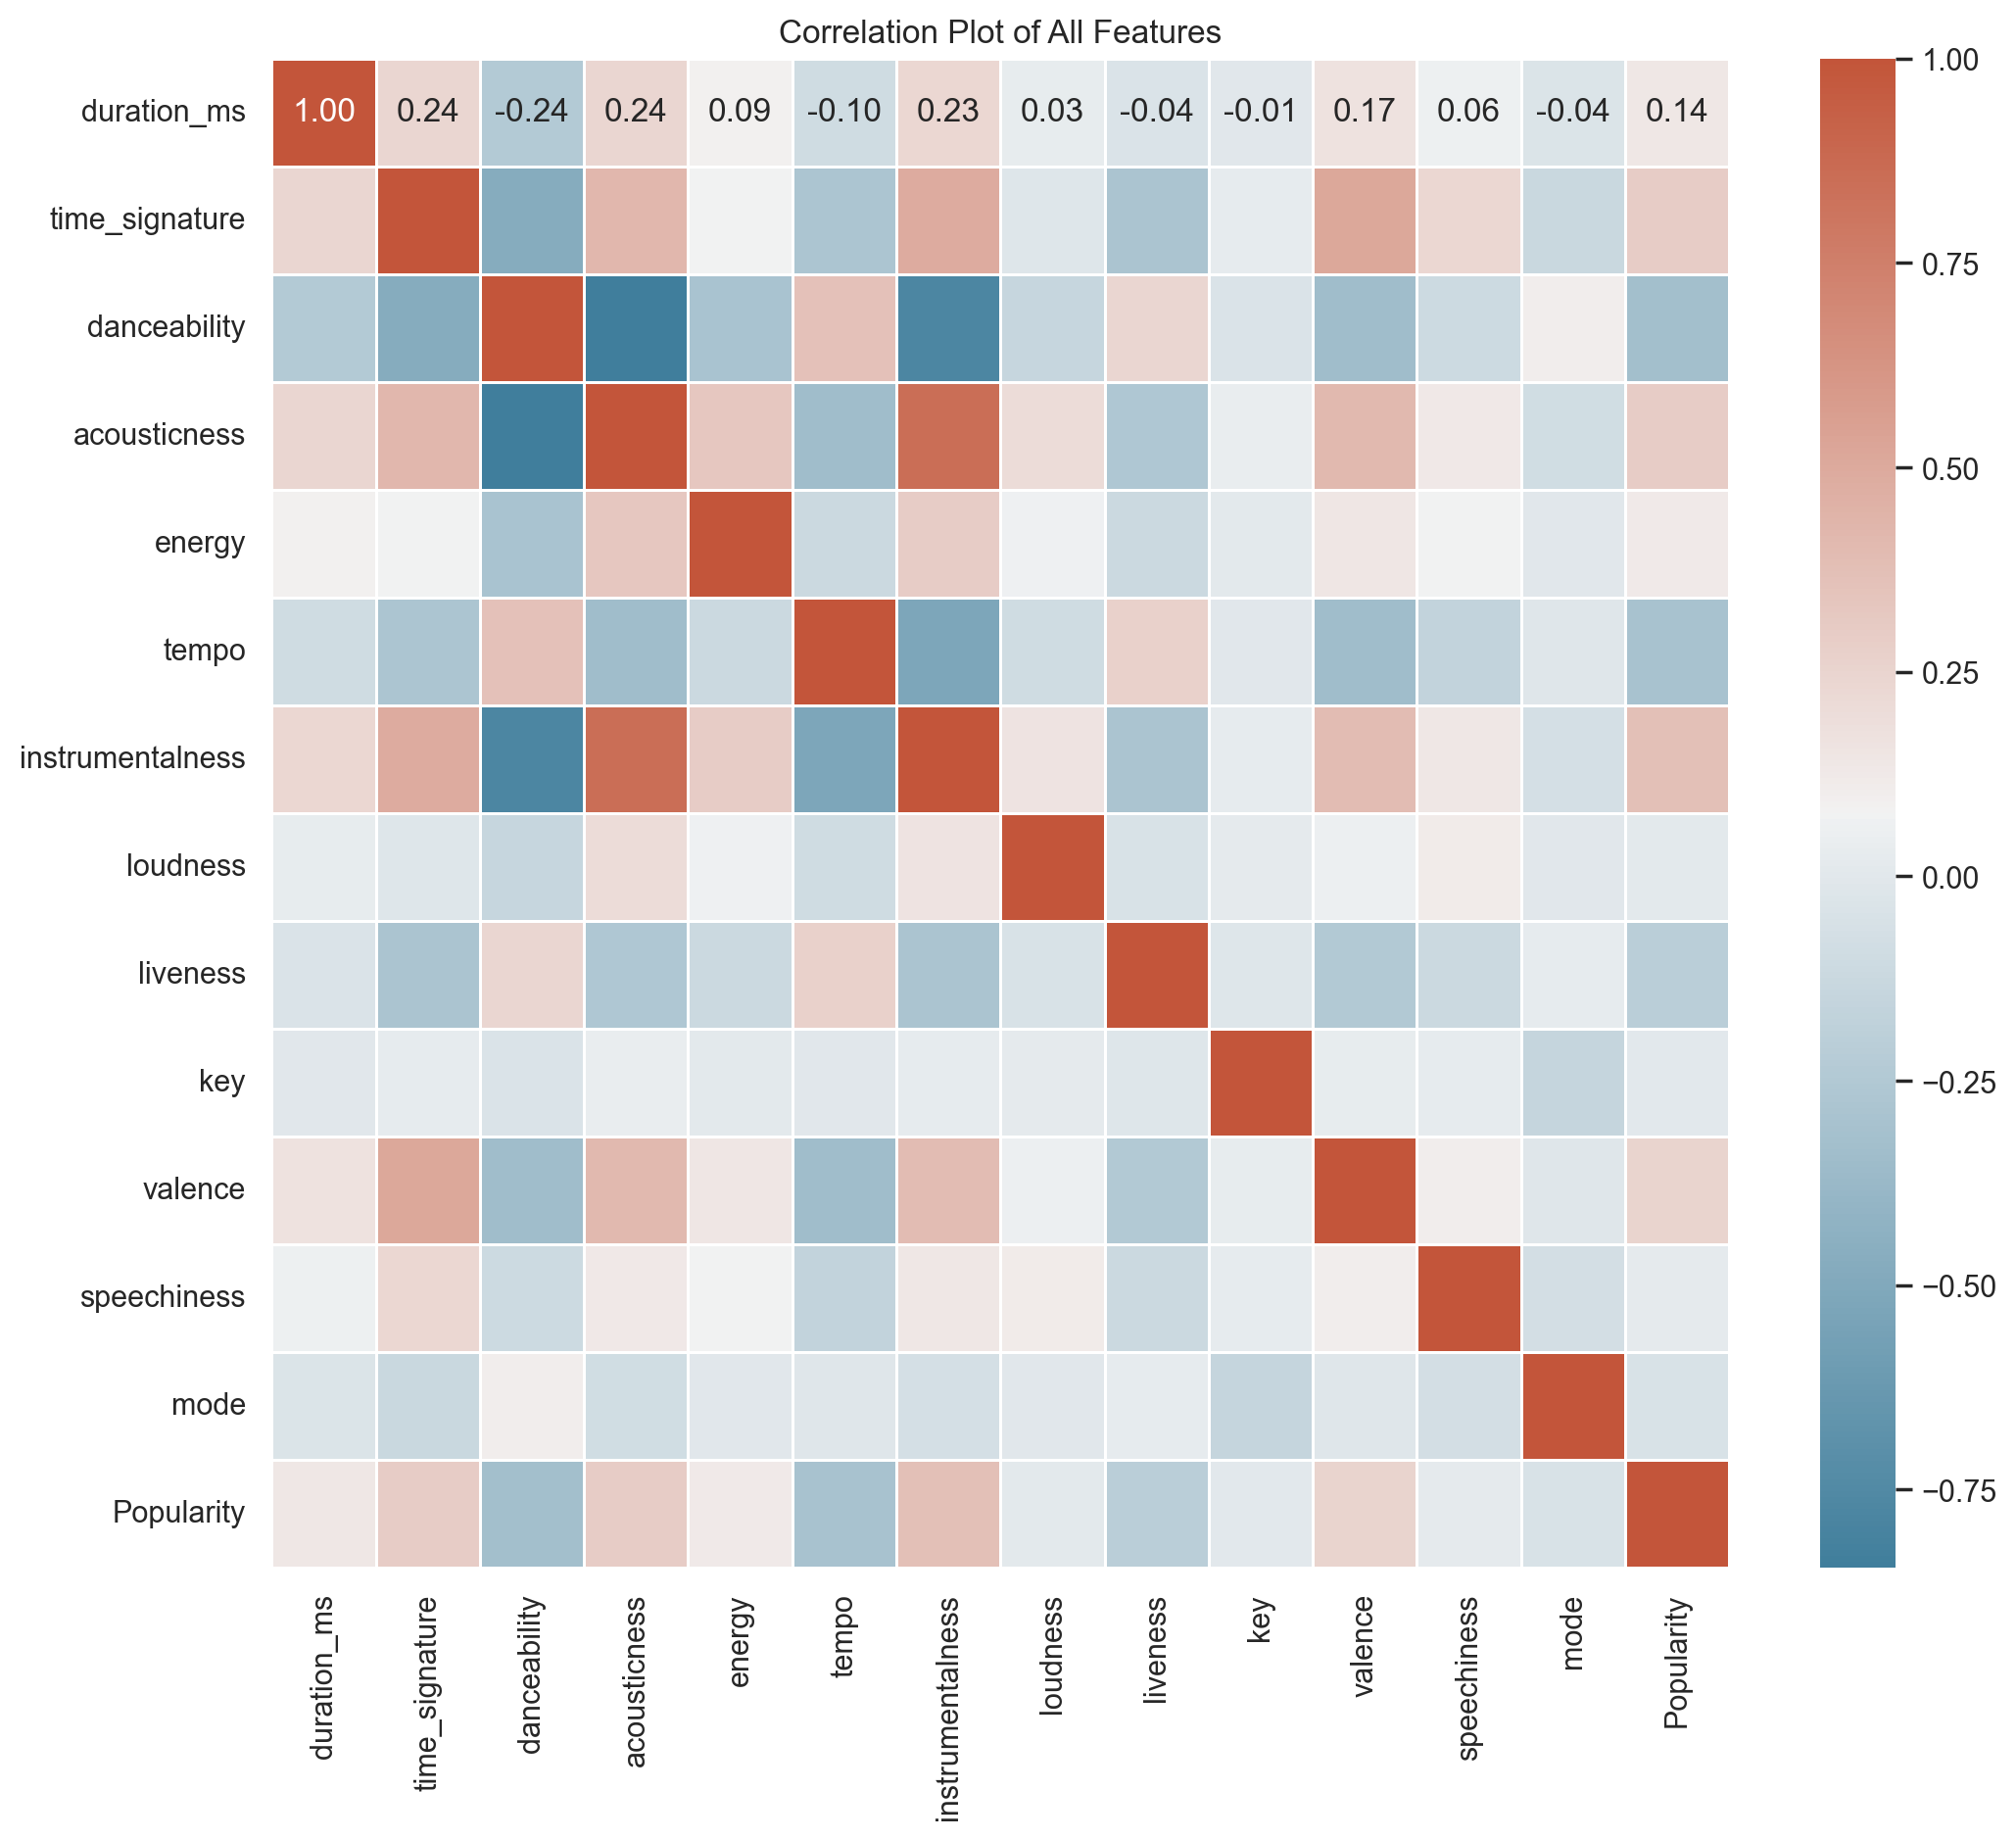

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for all numerical features in your DataFrame
corr = df_num.corr()

# Set up the matplotlib figure and adjust its size
plt.figure(figsize=(12, 10))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Plot of All Features')
plt.show()



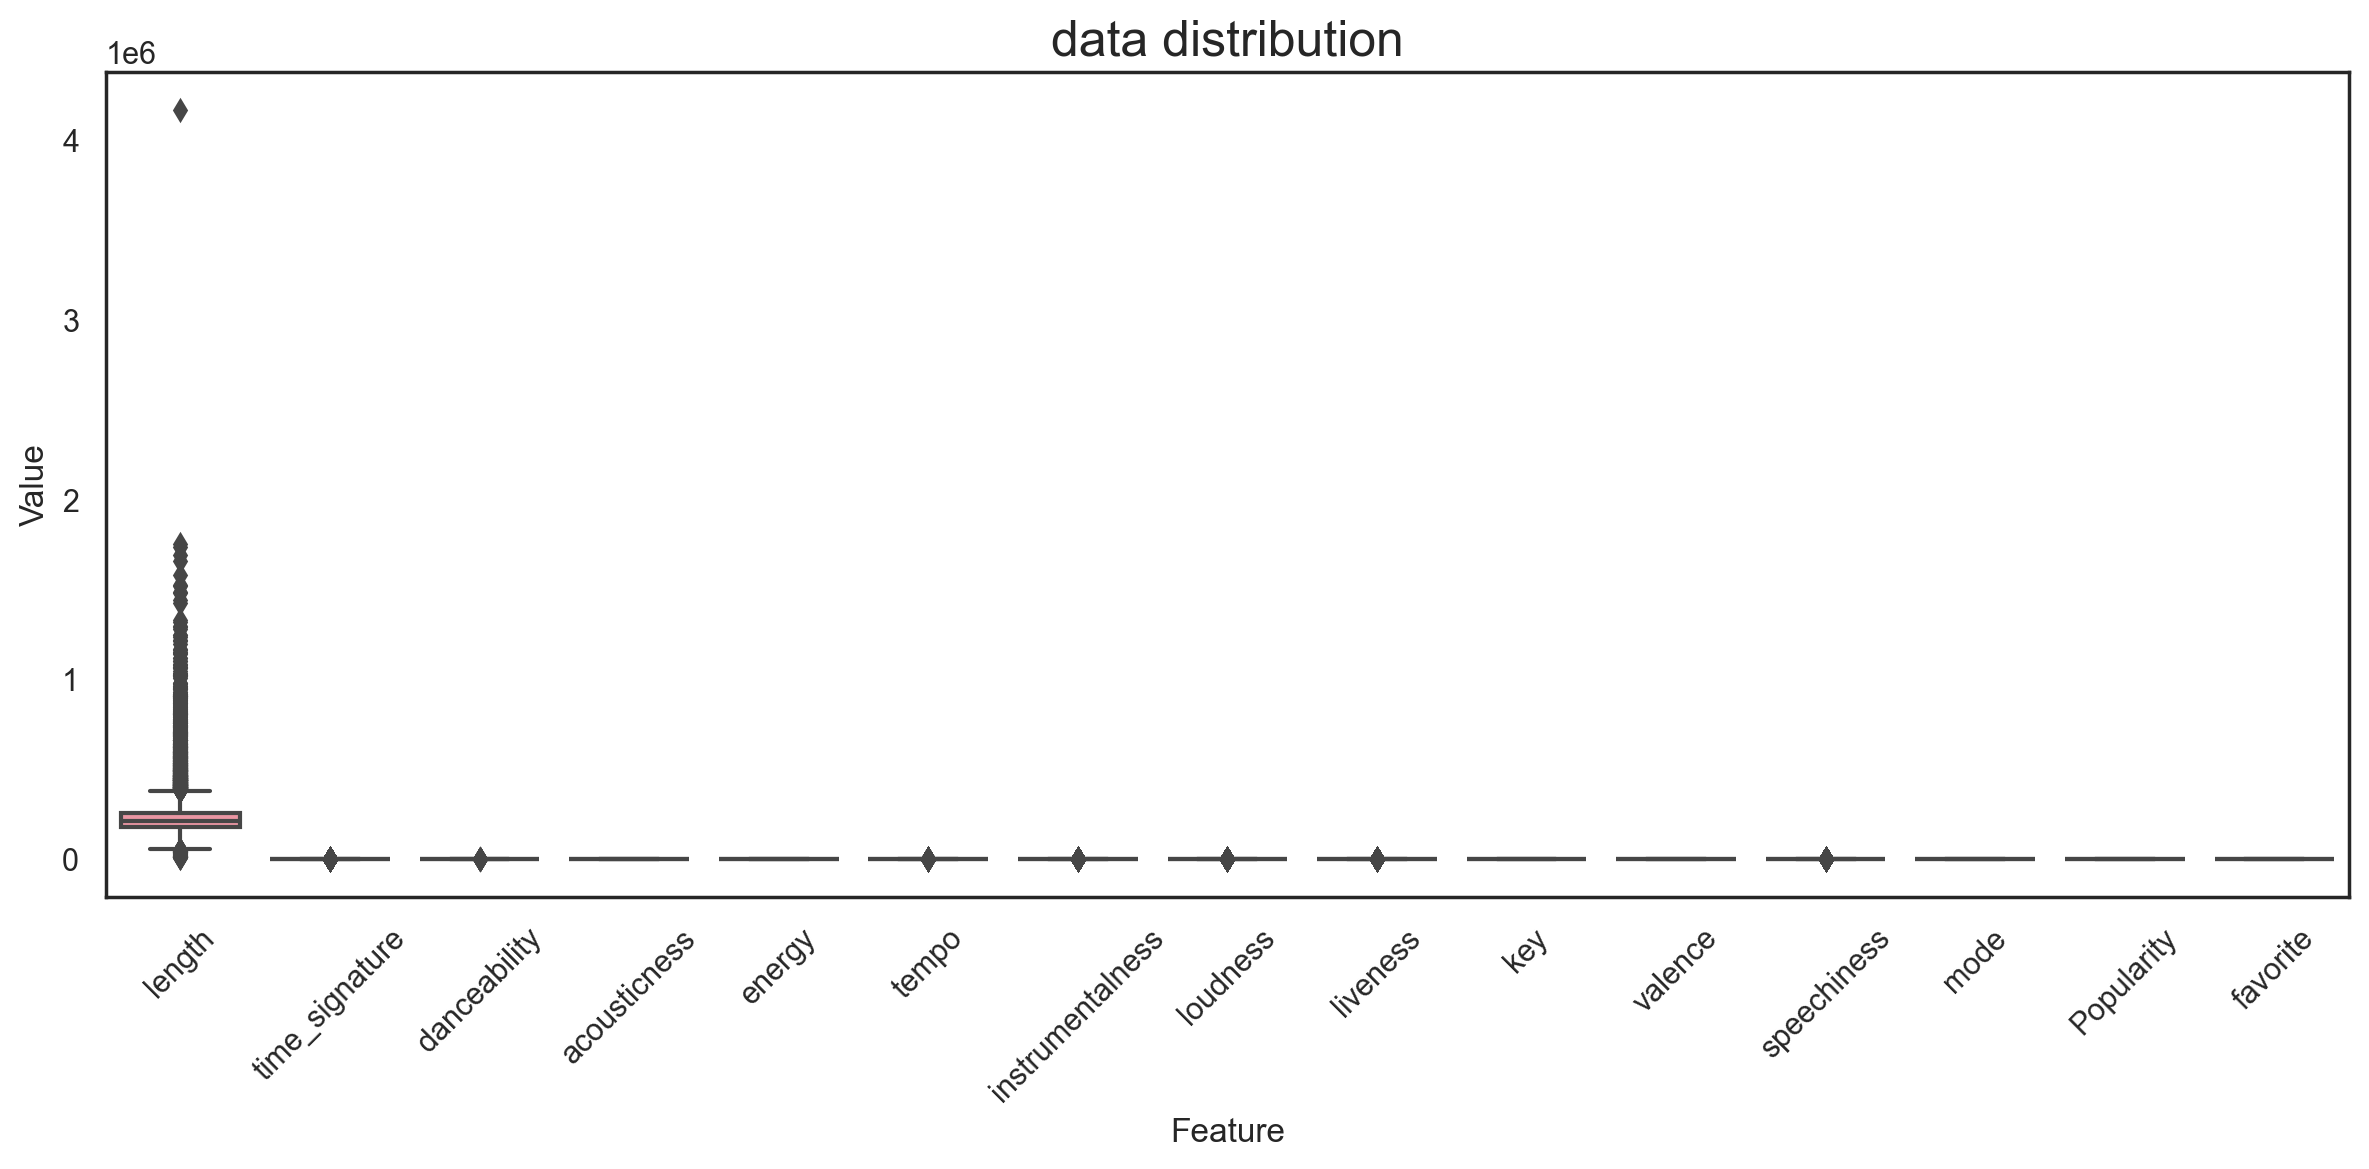

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Stacking the data for a single box plot
stacked_data = df_num.melt(var_name='Feature', value_name='Value')

# Create a single box plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()


In [ ]:
df_num.describe()

,duration_ms,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,mode,Popularity
count,12816.000000,12816.000000,12816.000000,12816.000000,12816.000000,12816.000000,12816.000000,12816.000000,1.281600e+04,12816.000000,12816.000000,12816.000000,12816.000000,12816.000000
mean,3.900281,0.552835,0.313681,0.595518,120.270014,0.183864,-9.590158,0.183764,2.386255e+05,5.300016,0.436853,0.080411,0.638031,50.612047
std,0.438541,0.188450,0.361110,0.284003,28.983966,0.324577,6.924845,0.149222,1.256675e+05,3.549851,0.258840,0.088288,0.480589,19.396017
min,0.000000,0.000000,0.000001,0.000568,0.000000,0.000000,-44.150000,0.012000,9.750000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.428000,0.015200,0.417000,98.291250,0.000000,-10.927000,0.094200,1.774000e+05,2.000000,0.217000,0.036800,0.000000,39.000000
50%,4.000000,0.570000,0.125000,0.659000,122.015000,0.000315,-7.193000,0.122000,2.121920e+05,5.000000,0.420000,0.047300,1.000000,52.000000
75%,4.000000,0.691250,0.601000,0.831000,137.973250,0.187250,-5.170750,0.226000,2.592770e+05,8.000000,0.636000,0.078700,1.000000,64.000000
max,5.000000,0.978000,0.996000,0.999000,219.446000,0.986000,1.177000,0.985000,4.170227e+06,11.000000,0.994000,0.960000,1.000000,100.000000


In [ ]:
# Compute the correlation matrix for all numerical features in your DataFrame
corr = df_num.corr()

# Extract only the numerical correlation values
correlation_values = corr.unstack().sort_values(ascending=False)

# Filter out correlation values that are 1 (correlation of a feature with itself)
correlation_values = correlation_values[correlation_values < 1]

# Print the correlation values
print(correlation_values)


instrumentalness  acousticness        0.851700
acousticness      instrumentalness    0.851700
valence           time_signature      0.513647
time_signature    valence             0.513647
instrumentalness  time_signature      0.491933
                                        ...   
                  tempo              -0.527288
danceability      instrumentalness   -0.776570
instrumentalness  danceability       -0.776570
danceability      acousticness       -0.845010
acousticness      danceability       -0.845010
Length: 182, dtype: float64


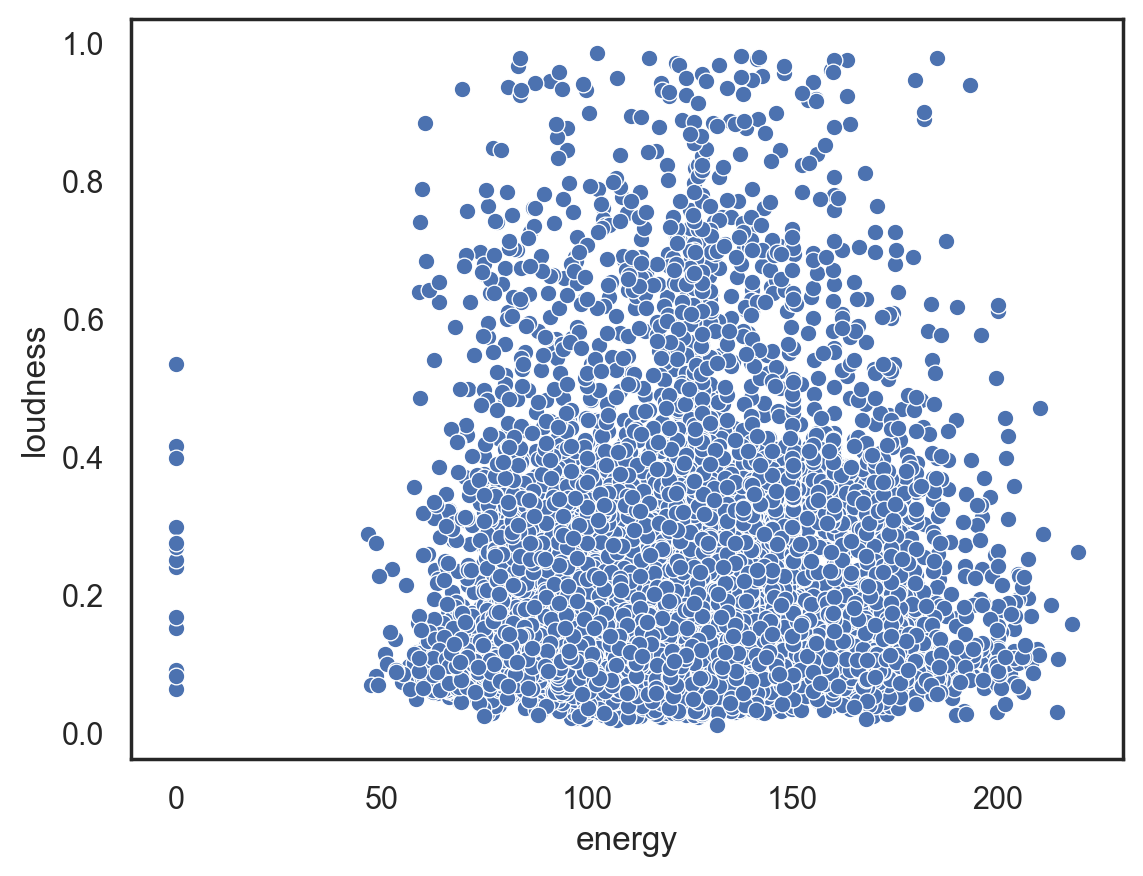

In [ ]:
sns.scatterplot(x='energy', y='loudness', data=df)
plt.show()

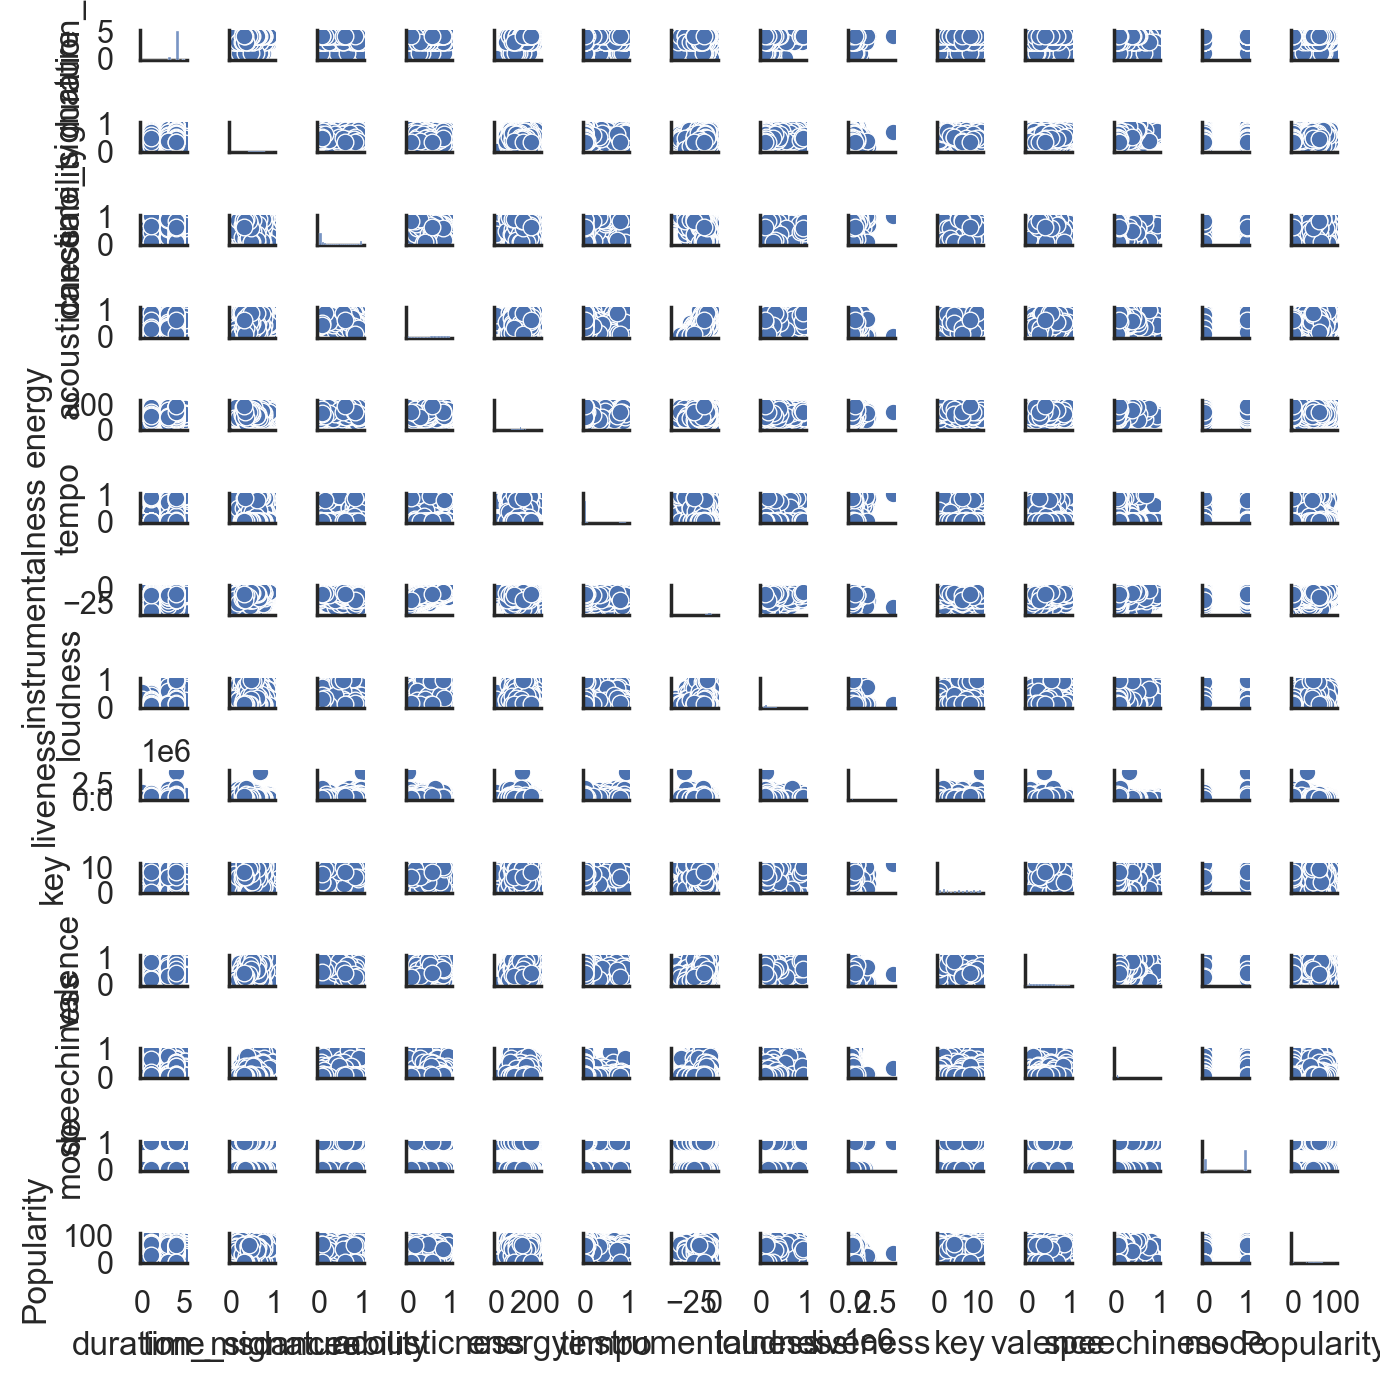

In [ ]:
# Use pairplot to create a scatter matrix with a smaller height
sns.pairplot(df_num, height=.5)  # Adjust the height value as needed
plt.show()


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12476 entries, 0 to 12475
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          12476 non-null  object 
 1   Song              12476 non-null  object 
 2   Artists           12476 non-null  object 
 3   Album             12476 non-null  object 
 4   length            12476 non-null  int64  
 5   time_signature    12476 non-null  int64  
 6   danceability      12476 non-null  float64
 7   acousticness      12476 non-null  float64
 8   energy            12476 non-null  float64
 9   tempo             12476 non-null  float64
 10  instrumentalness  12476 non-null  float64
 11  loudness          12476 non-null  float64
 12  liveness          12476 non-null  float64
 13  key               12476 non-null  float64
 14  valence           12476 non-null  float64
 15  speechiness       12476 non-null  float64
 16  mode              12476 non-null  int64 

<Axes: xlabel='energy', ylabel='danceability'>

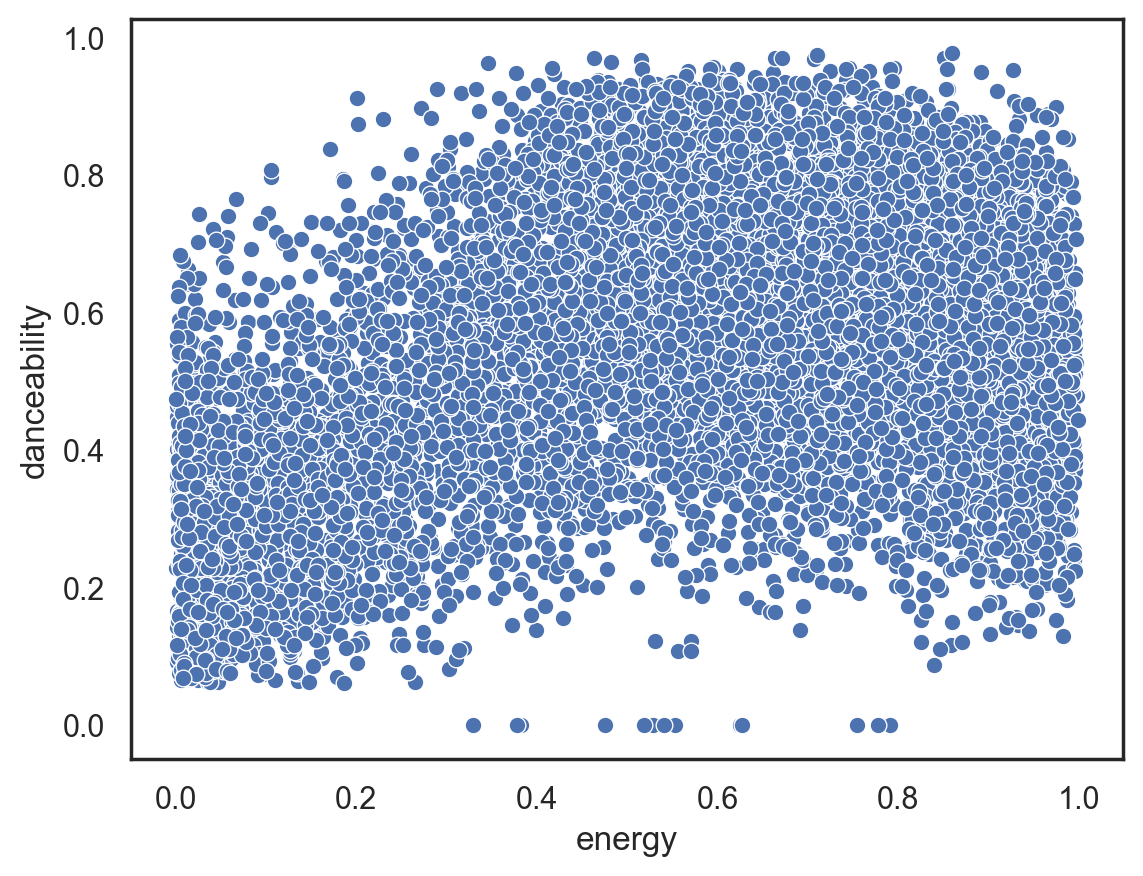

In [153]:
sns.scatterplot(data=df, x="energy", y="danceability")

### PCA

In [ ]:
#feature matrixz
x= df.values
x.shape

(12816, 18)

In [ ]:
from prince import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame called 'train' with your data
train = pd.DataFrame()  # Replace with your data

# Instantiate and fit PCA
pca = PCA(n_components=2)
pca.fit(train)

# Create a biplot
ax = pca.plot_row_coordinates(
    train, ax=None, figsize=(8, 8), x_component=0, y_component=1, color_labels=train.columns, ellipse_fill=False
)

# Add grid lines
ax.axhline(0, color='black', linestyle='--', linewidth=0.5)
ax.axvline(0, color='black', linestyle='--', linewidth=0.5)

plt.show()
